In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys
from keras.utils import to_categorical
from keras import callbacks

## Dataset import and processing

In [ ]:
# Import the labeled images
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


In [ ]:
targets_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# 9 --> [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
# 0 --> [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
# ...
# 5 --> [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

### Question 1 : Étudier la répartition des classes dans le dataset

### Méthode 1 : manuellement

In [ ]:
compteur = {0:0, 1:0,
            2:0, 3:0,
            4:0, 5:0,
            6:0, 7:0,
            8:0, 9:0}

for k in y_train:
    compteur[k] += 1

for k in y_test:
    compteur[k] += 1

print(compteur)

{0: 7000, 1: 7000, 2: 7000, 3: 7000, 4: 7000, 5: 7000, 6: 7000, 7: 7000, 8: 7000, 9: 7000}


### Méthode 2 : Numpy

In [ ]:
y = np.concatenate((y_train, y_test), axis=0)
unique, counts = np.unique(y, return_counts=True)

In [ ]:
print("Valeurs :", unique)
print("Occurences :", counts)

Valeurs : [0 1 2 3 4 5 6 7 8 9]
Occurences : [7000 7000 7000 7000 7000 7000 7000 7000 7000 7000]


### Donut chart

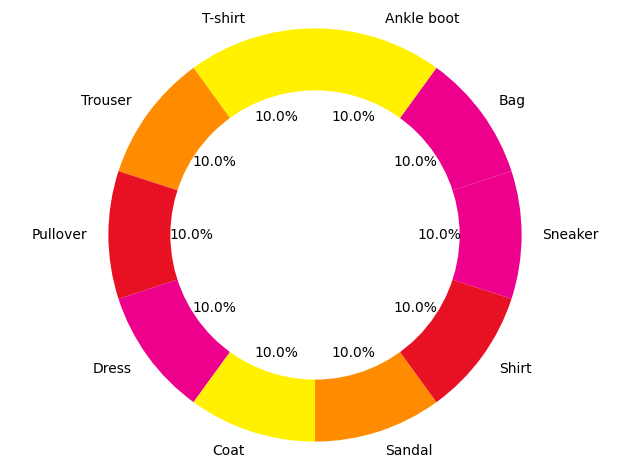

In [ ]:
# Choix des couleurs
colors =['#fff100', '#ff8c00', '#e81123', '#ec008c', '#fff100', '#ff8c00', '#e81123', '#ec008c', '#ec008c']

# Construction du diagramme et affichage des labels et des #fréquences en pourcentage

fig1, ax1 = plt.subplots()
ax1.pie(counts, colors = colors, labels=targets_names, autopct='%1.1f%%', startangle=90)

# Tracé du cercle au milieu

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Affichage du diagramme

ax1.axis('equal')
plt.tight_layout()
plt.show()

## Question 2 : faire la vérification du dataset sur 9 images trouvées aléatoirement

In [ ]:
random_indices = np.random.choice(len(X_train), 9, replace=False)
print(random_indices)

[46003 22954 59755 32309  1931 50611 47606 16440 31323]


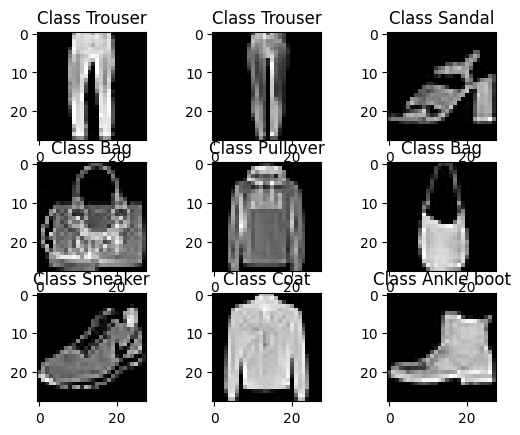

In [ ]:
for i, idxtrain in enumerate(random_indices):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idxtrain], cmap="gray")
    plt.title(f"Class {targets_names[y_train[idxtrain]]}")

## Question 3 : faire la partie formattage du dataset : reshape, normalisation et formattage de y en données catégorielle

### Passage de données matricielles à des données vectorielles

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
X_train.shape

(60000, 784)

### Normalisation des valeurs des pixels

*   0 < px < 255
*   0 < px < 1

In [ ]:
X_train = X_train/255
X_test = X_test/255

### Transformer y_train en données catégorielle

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train, 10)

In [ ]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

## Question 4 : définir l'architecture du réseau de neurones et lancer l'entraînement. Le réseau doit contenir 5 couches :


*   Couche d'entrée avec le bon nombre de neurones
*   1ère couche cachée : 64 neurones
*   2ème couche cachée : 128 neurones
*   3ème couche cachée : 64 neurones
*   Couche de sortie avec le bon nombre de neurones


In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(784,))) # couche d'entrée

model.add(tf.keras.layers.Dense(64, activation="relu")) # couche cachée n°1
model.add(tf.keras.layers.Dense(128, activation="relu")) # couche cachée n°2
model.add(tf.keras.layers.Dense(64, activation="relu")) # couche cachée n°3

model.add(tf.keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,466 (263.54 KB)

 Trainable params: 67,466 (263.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam", # méthode de descente de gradient
    metrics=["accuracy"]
)

#callback = callbacks.EarlyStopping(monitor='loss', patience=5)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=20,
                    #callbacks=[callback],
                    validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9616 - loss: 0.1004 - val_accuracy: 0.8840 - val_loss: 0.5688
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9593 - loss: 0.1019 - val_accuracy: 0.8832 - val_loss: 0.6198
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9620 - loss: 0.1032 - val_accuracy: 0.8853 - val_loss: 0.5565
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9654 - loss: 0.0923 - val_accuracy: 0.8831 - val_loss: 0.6558
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9624 - loss: 0.1001 - val_accuracy: 0.8802 - val_loss: 0.7226
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9654 - loss: 0.0954 - val_accuracy: 0.8828 - val_loss: 0.6492
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9634 - loss: 0.0947 - val_accuracy: 0.8849 - val_loss: 0.6318
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9635 - loss: 0.0940 -

## Question 5 : tracer les courbes d'évolution des métriques pendant l'entraînement

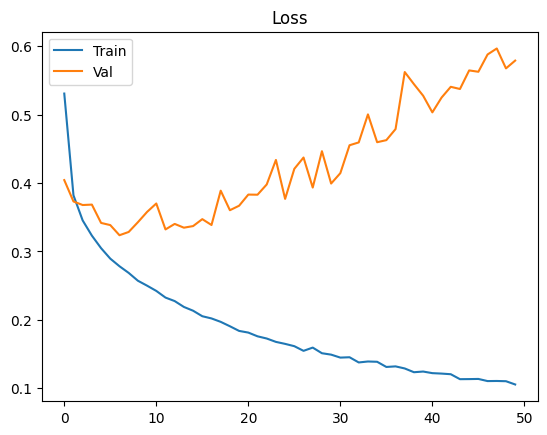

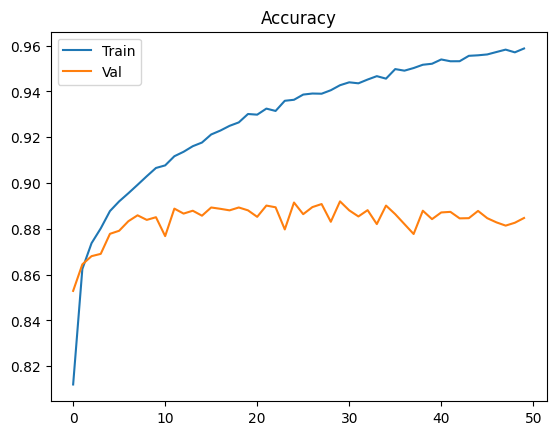

In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend()
plt.title("Accuracy")
plt.show()

## Question 6 : calcul de l'accuracy et tracé de la matrice de confusion (sur les données de test)

In [ ]:
from sklearn.metrics import confusion_matrix

y_predict = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
y_predict[:10]

array([[2.04496378e-10, 3.42036783e-14, 1.53384855e-15, 1.28991895e-11,
        1.24371775e-15, 1.99369268e-08, 3.10352383e-10, 2.39205832e-07,
        9.74535038e-15, 9.99999762e-01],
       [9.19986221e-09, 2.82072906e-19, 9.99678373e-01, 7.20345008e-12,
        3.14142264e-04, 2.48011247e-17, 7.55227029e-06, 5.53784599e-19,
        3.00833969e-10, 3.54809033e-30],
       [2.56855722e-37, 1.00000000e+00, 0.00000000e+00, 2.54014829e-26,
        1.17220018e-40, 0.00000000e+00, 2.79305788e-24, 0.00000000e+00,
        9.86098850e-36, 0.00000000e+00],
       [2.81951359e-29, 1.00000000e+00, 8.16850933e-34, 1.56384156e-19,
        2.46008174e-33, 1.04993689e-40, 4.40228086e-18, 4.76441478e-43,
        1.51948051e-24, 4.24153259e-35],
       [1.24896400e-01, 4.90750442e-17, 5.64016955e-06, 4.02379546e-10,
        1.94252808e-10, 4.40401838e-14, 8.75097990e-01, 1.20913184e-23,
        2.69333843e-11, 2.07493911e-20],
       [1.11024584e-27, 1.00000000e+00, 7.98740125e-44, 5.29216805e-25,
   

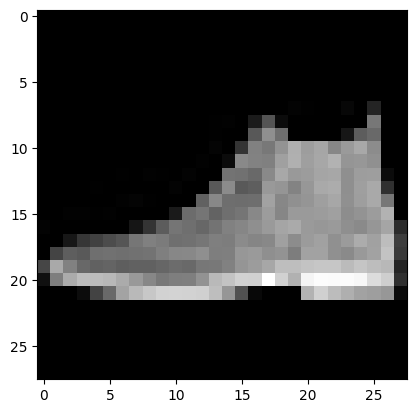

In [ ]:
plt.imshow(X_test[0].reshape(28, 28), cmap="gray")

In [ ]:
y_predict = np.array(tf.argmax(y_predict, axis=1))

In [ ]:
y_predict[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# prompt: calcul de l'accuracy

score = model.evaluate(X_test, to_categorical(y_test, 10), verbose=0)
#print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test accuracy: 0.8815000057220459


In [ ]:
S=confusion_matrix(y_test, y_predict)

In [ ]:
S

array([[806,   1,  12,  29,   0,   0, 143,   0,   9,   0],
       [  1, 968,   0,  23,   2,   1,   4,   0,   1,   0],
       [ 14,   2, 769,  15,  91,   1, 101,   1,   6,   0],
       [ 13,  10,   9, 914,  19,   0,  31,   0,   4,   0],
       [  3,   3,  96,  52, 754,   0,  86,   0,   6,   0],
       [  0,   0,   0,   0,   0, 956,   0,  26,   3,  15],
       [101,   1,  47,  35,  55,   0, 753,   0,   8,   0],
       [  0,   0,   0,   0,   0,  17,   0, 943,   3,  37],
       [  4,   3,   4,   4,   4,   2,   7,   5, 967,   0],
       [  0,   0,   0,   0,   0,   9,   1,  21,   0, 969]])

<ipython-input-91-db875ec562ee>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Reds')


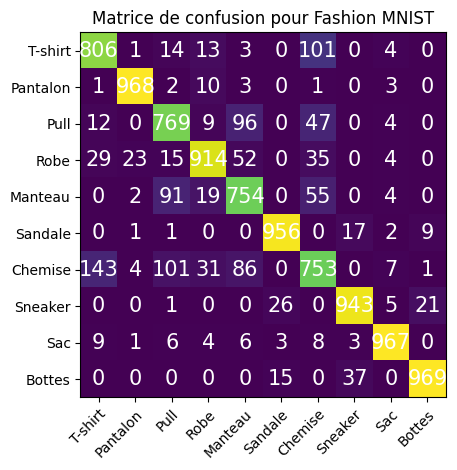

In [ ]:
fig, ax = plt.subplots()

img = ax.imshow(S)

x_label_list = ["T-shirt", "Pantalon", "Pull", "Robe", "Manteau", "Sandale", "Chemise", "Sneaker", "Sac", "Bottes"]

ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))

ax.set_xticklabels(x_label_list,rotation ='vertical',verticalalignment='top')
ax.set_yticklabels(x_label_list)

ax.set_title("Matrice de confusion pour Fashion MNIST")

cmap = plt.cm.get_cmap('Reds')

for i in range(len(x_label_list)):
    for j in range(len(x_label_list)):
        text = ax.text(j, i, S[j,i],fontsize=15,
                       ha="center", va="center", color="white")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.tight_layout()
#plt.savefig('similarity.png',)
plt.show()

In [ ]:
# Approche pour aller plus loin

# Model_1
# Classe 1 = "Pantalon"
# Classe 2 = "T-shirt, Chemise, Manteau, Pull"
# Classe 3 = "Sandales, Bottes, Sneaker"
# Classe 4 = "Robe"
# Classe 5 = "Sac"

# Model_haut
# Classe 1 = "T-shirt"
# Classe 2 = "Chemise"
# Classe 3 = "Manteau"
# Classe 4 = "Pull"